In [8]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")

home_dir = "../.."
src_path = os.path.join(home_dir, "src")

# Add the `src` folder to the Python path
sys.path.append(src_path)

from functions import (compute_distance_correlation_matrix,
 wgtda, compute_wto_matrix, compute_pearson_correlation_matrix,
  patient_correlation_measure)

from filters import remove_inf_values, extract_top_n_persistent_holes, filter_rows_by_list_length
from network import plot_gene_network, plot_gene_network_interactive, plot_gene_network_interactive2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
# Load data
expression_matrix = pd.read_csv("../../data/cancer_type/fpkm_matrix.csv", index_col=0)
significant_genes = pd.read_csv("../../data/cancer_type/significant_genes.csv", index_col=0)

# Separate phenotype labels
phenotype = expression_matrix["phenotype"]
expression_matrix = expression_matrix.drop(columns=["phenotype"])

# Select significant genes
significant_gene_names = significant_genes.index
sig_exp_matrix = expression_matrix[significant_gene_names.intersection(expression_matrix.columns)]

top_var_genes_data = sig_exp_matrix
gene_dict = {i: col_name for i, col_name in enumerate(top_var_genes_data.columns)}
top_var_genes_data["phenotype"] = phenotype.values

sarc_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'TCGA-SARC']
esca_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'TCGA-ESCA']
pcpg_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'TCGA-PCPG']

sarc_top_var_genes_data = sarc_top_var_genes_data.drop(columns=["phenotype"])
esca_top_var_genes_data = esca_top_var_genes_data.drop(columns=["phenotype"])
pcpg_top_var_genes_data = pcpg_top_var_genes_data.drop(columns=["phenotype"])

SARC_pearson_corr_matrix = compute_pearson_correlation_matrix(sarc_top_var_genes_data.values)
ESCA_pearson_corr_matrix = compute_pearson_correlation_matrix(esca_top_var_genes_data.values)
PCPG_pearson_corr_matrix = compute_pearson_correlation_matrix(pcpg_top_var_genes_data.values)

# Define number of landscapes and resolution
num_landscape = 2
resolution = 100

In [10]:
sarc_interactions = wgtda(SARC_pearson_corr_matrix, dimensions=3, gene_dict=gene_dict)

In [11]:
sarc_interactions = remove_inf_values(sarc_interactions)
sarc_interactions_3 = filter_rows_by_list_length(sarc_interactions,"geneset",min_length= 3)

persistent_holes = extract_top_n_persistent_holes(sarc_interactions_3, 10)
print(persistent_holes)

    interaction_id betti_number     birth     death  lifespan     birth_nodes  \
137            137            0  0.000000  0.788879  0.788879         [34, 2]   
136            136            0  0.000000  0.749316  0.749316            [14]   
135            135            0  0.000000  0.744015  0.744015            [99]   
134            134            0  0.000000  0.738911  0.738911           [129]   
133            133            0  0.000000  0.735430  0.735430            [64]   
132            132            0  0.000000  0.733451  0.733451        [66, 63]   
131            131            0  0.000000  0.731963  0.731963             [4]   
130            130            0  0.000000  0.730231  0.730231            [12]   
129            129            0  0.000000  0.719976  0.719976        [73, 63]   
128            128            0  0.000000  0.716270  0.716270       [115, 71]   
127            127            0  0.000000  0.708131  0.708131            [54]   
126            126          

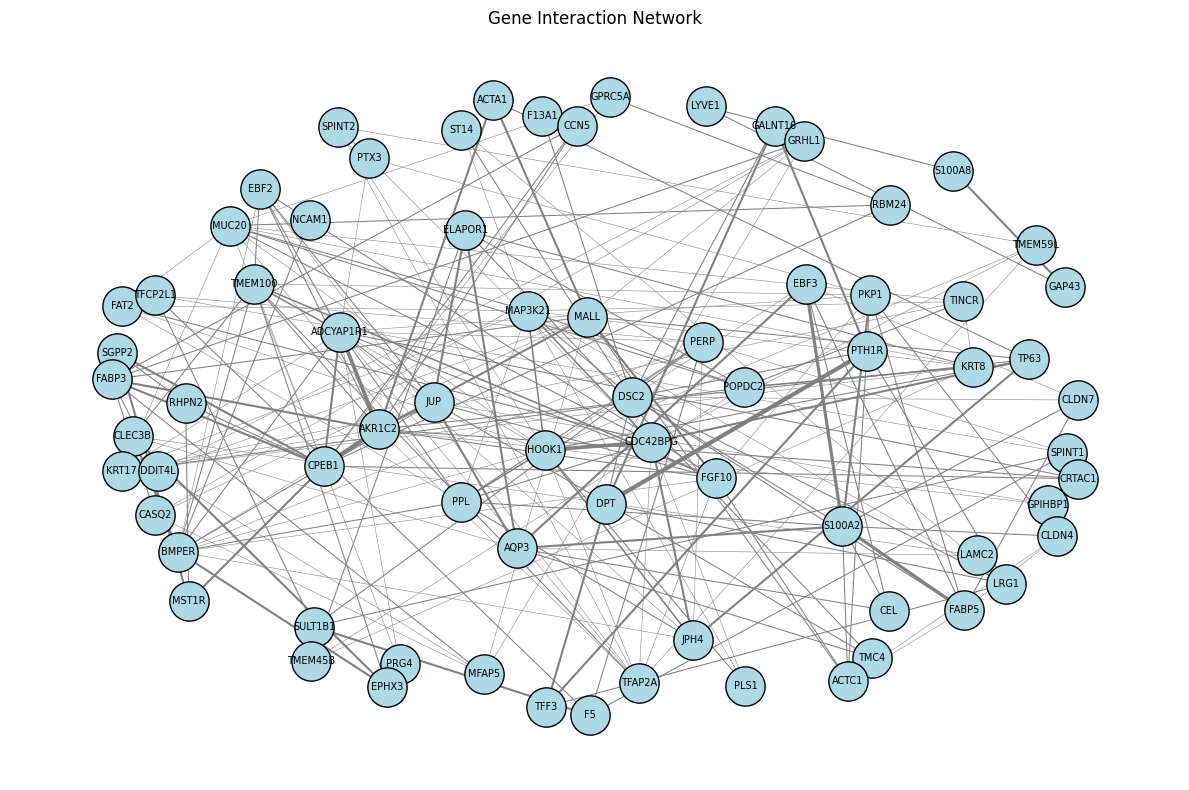

In [12]:
plot_gene_network(df=persistent_holes)

In [13]:
#plot_gene_network_interactive(persistent_holes, geneset_col='geneset', output_file='../../index.html')
plot_gene_network_interactive2(persistent_holes, geneset_col='geneset', output_file='../../index.html')

../../index.html


In [14]:
from pyvis.network import Network

# Initialize network with CDN resources set to inline
net = Network(notebook=True, cdn_resources="in_line")
net.add_node("A", label="Node A")
net.add_node("B", label="Node B")
net.add_edge("A", "B")

# Save and display the network
net.show("simple_network.html")


simple_network.html
